# **IPL Data Analysis and 2025 winner prediction model**

This notebook presents a comprehensive analysis of Indian Premier League (IPL) data from the inception of the league in 2008 through to the most recent season in 2024, with the goal of uncovering key insights, trends, and patterns within the data. It includes data collection and preprocessing steps, exploratory data analysis (EDA) to visualize key metrics such as win rates, player performance, and team statistics, and statistical insights to identify significant factors influencing match outcomes. The notebook then introduces a Random Forest Classification model to predict the winner of the 2025 IPL season, explaining the model’s features, training, validation, and performance evaluation. The results section presents the model’s predictions for the 2025 season, discusses the potential strengths and limitations of the model, and provides insights into the predicted performance of teams and key players. The primary objective is to leverage historical IPL data to build a predictive model that forecasts future match outcomes, offering a data-driven prediction for the 2025 IPL winner while illustrating the application of machine learning techniques to real-world sports data.


In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [58]:
# Read the CSV files into Pandas DataFrames
deliveries = pd.read_csv('/content/deliveries.csv')
matches = pd.read_csv('/content/matches.csv')

# Display the first 5 rows of each DataFrame
print("First 5 rows of deliveries:")
print(deliveries.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFirst 5 rows of matches:")
print(matches.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types for each DataFrame
print("\nInformation of deliveries:")
print(deliveries.info())

print("\nInformation of matches:")
print(matches.info())


First 5 rows of deliveries:
| match_id   | inning   | batting_team          | bowling_team                | over   | ball   | batter      | bowler   | non_striker   | batsman_runs   | extra_runs   | total_runs   | extras_type   | is_wicket   | player_dismissed   | dismissal_kind   | fielder   |
|:-----------|:---------|:----------------------|:----------------------------|:-------|:-------|:------------|:---------|:--------------|:---------------|:-------------|:-------------|:--------------|:------------|:-------------------|:-----------------|:----------|
| 335982     | 1        | Kolkata Knight Riders | Royal Challengers Bangalore | 0      | 1      | SC Ganguly  | P Kumar  | BB McCullum   | 0              | 1            | 1            | legbyes       | 0           | nan                | nan              | nan       |
| 335982     | 1        | Kolkata Knight Riders | Royal Challengers Bangalore | 0      | 2      | BB McCullum | P Kumar  | SC Ganguly    | 0              | 0           

# **IPL 2008 - 2024 Data Analysis**

In [59]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [60]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [61]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


### **Data Cleaning**

In [62]:
# Drop rows with missing values in the 'winner' column
matches = matches.dropna(subset=['winner'])
matches['player_of_match'].fillna('Unknown', inplace=True)

# Data Cleaning and Preprocessing
matches.dropna(subset=['winner'], inplace=True)
matches['player_of_match'].fillna('Unknown', inplace=True)

# Remove irrelevant columns
matches.drop(columns=['city'], inplace=True)

# Impute missing numerical values with medians
for col in ['result_margin', 'target_runs', 'target_overs']:
    matches[col].fillna(matches[col].median(), inplace=True)

<ipython-input-62-202f7ed546ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['player_of_match'].fillna('Unknown', inplace=True)
<ipython-input-62-202f7ed546ff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches.dropna(subset=['winner'], inplace=True)
<ipython-input-62-202f7ed546ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['player_of_match'].fillna('Unknown', inplace=True)
<ipython-input-62-202f7ed546ff

In [63]:
# Inpute missing value in 'player_of_match'
matches['player_of_match'] = matches['player_of_match'].fillna('Unknown')

<ipython-input-63-45e734c7d402>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['player_of_match'] = matches['player_of_match'].fillna('Unknown')


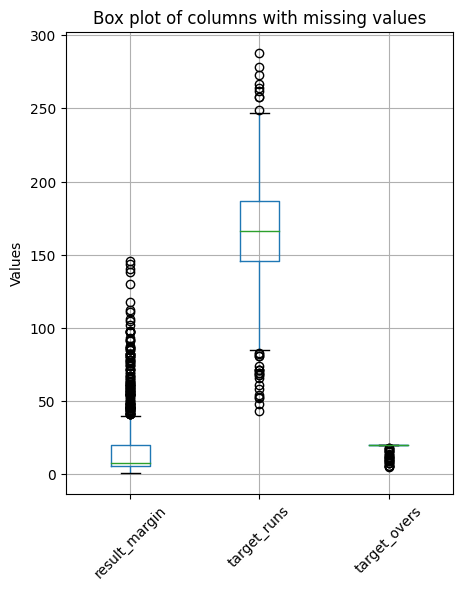

In [64]:
import matplotlib.pyplot as plt

columns_to_handle_missing = ['result_margin', 'target_runs', 'target_overs']

# Plot box plots for each column
plt.figure(figsize=(5, 6))
matches[columns_to_handle_missing].boxplot()
plt.title('Box plot of columns with missing values')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [65]:
# Impute selected columns with median because they have outliers

matches['result_margin'] = matches['result_margin'].fillna(matches['result_margin'].median())
matches['target_runs'] = matches['target_runs'].fillna(matches['target_runs'].median())
matches['target_overs'] = matches['target_overs'].fillna(matches['target_overs'].median())

In [66]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1090 non-null   int64  
 1   season           1090 non-null   object 
 2   date             1090 non-null   object 
 3   match_type       1090 non-null   object 
 4   player_of_match  1090 non-null   object 
 5   venue            1090 non-null   object 
 6   team1            1090 non-null   object 
 7   team2            1090 non-null   object 
 8   toss_winner      1090 non-null   object 
 9   toss_decision    1090 non-null   object 
 10  winner           1090 non-null   object 
 11  result           1090 non-null   object 
 12  result_margin    1090 non-null   float64
 13  target_runs      1090 non-null   float64
 14  target_overs     1090 non-null   float64
 15  super_over       1090 non-null   object 
 16  method           21 non-null     object 
 17  umpire1          10

In [67]:
matches.nunique()

id                 1090
season               17
date                821
match_type            8
player_of_match     291
venue                58
team1                19
team2                19
toss_winner          19
toss_decision         2
winner               19
result                3
result_margin        98
target_runs         169
target_overs         15
super_over            2
method                1
umpire1              62
umpire2              62
dtype: int64

# Feature Engineering

Create new features:

In [68]:
# Calculate win percentage for each team
team_wins = matches['winner'].value_counts()
total_matches = matches.groupby('team1').size() + matches.groupby('team2').size()
win_percentage = team_wins / total_matches

# Add win percentage as a feature
matches['team1_win_pct'] = matches['team1'].map(win_percentage)
matches['team2_win_pct'] = matches['team2'].map(win_percentage)

# Create a feature for toss winner advantage
matches['toss_winner_is_match_winner'] = (matches['toss_winner'] == matches['winner']).astype(int)

# Extract year from date
matches['year'] = pd.to_datetime(matches['date']).dt.year

# Create a feature for number of matches played by each team in a season
matches['team1_matches_played'] = matches.groupby(['season', 'team1']).cumcount() + 1
matches['team2_matches_played'] = matches.groupby(['season', 'team2']).cumcount() + 1

Encode categorical variables:

In [69]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['season', 'match_type', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']

le = LabelEncoder()
for col in categorical_columns:
    matches[col + '_encoded'] = le.fit_transform(matches[col])

Select features for the model:

In [70]:
features = ['team1_win_pct', 'team2_win_pct', 'toss_winner_is_match_winner', 'year',
            'team1_matches_played', 'team2_matches_played', 'team1_encoded', 'team2_encoded',
            'toss_winner_encoded', 'toss_decision_encoded', 'venue_encoded']

X = matches[features]
y = matches['winner_encoded']

# Model Training

Split the data:

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the features:

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train the Random Forest model

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        37
           1       0.67      1.00      0.80         2
           2       0.83      0.71      0.77         7
           3       0.88      0.54      0.67        13
           4       1.00      0.20      0.33         5
           5       1.00      0.67      0.80         9
           6       0.60      0.53      0.56        17
           7       0.00      0.00      0.00         2
           8       0.71      0.65      0.68        23
           9       0.43      1.00      0.60         3
          10       0.61      0.88      0.72        26
          11       1.00      0.33      0.50         3
          12       0.00      0.00      0.00         3
          13       0.76      0.76      0.76        25
          14       0.67      0.50      0.57         4
          16       0.79      0.73      0.76        26
          17       0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature importance:

In [74]:
feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                        feature  importance
8           toss_winner_encoded    0.129126
6                 team1_encoded    0.119441
0                 team1_win_pct    0.114717
1                 team2_win_pct    0.110601
7                 team2_encoded    0.106889
3                          year    0.097889
10                venue_encoded    0.088305
2   toss_winner_is_match_winner    0.077238
4          team1_matches_played    0.066791
5          team2_matches_played    0.065550
9         toss_decision_encoded    0.023453


Hyperparameter tuning:

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best model
best_rf_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.7121444991789818


Predictions for 2025 Season:

In [76]:
def generate_2025_matches(matches, num_matches=60):
    teams = pd.concat([matches['team1'], matches['team2']]).unique()

    matches_2025 = pd.DataFrame()
    matches_2025['team1'] = np.random.choice(teams, num_matches)
    matches_2025['team2'] = np.random.choice(teams, num_matches)

    # Ensure team1 and team2 are different
    same_team = matches_2025['team1'] == matches_2025['team2']
    while same_team.any():
        matches_2025.loc[same_team, 'team2'] = np.random.choice(teams, same_team.sum())
        same_team = matches_2025['team1'] == matches_2025['team2']

    matches_2025['toss_winner'] = np.random.choice(['team1', 'team2'], num_matches)
    matches_2025['toss_decision'] = np.random.choice(['bat', 'field'], num_matches)
    matches_2025['venue'] = np.random.choice(matches['venue'].unique(), num_matches)

    matches_2025['year'] = 2025
    matches_2025['season'] = '2025'

    matches_2025['team1_win_pct'] = matches_2025['team1'].map(win_percentage)
    matches_2025['team2_win_pct'] = matches_2025['team2'].map(win_percentage)

    matches_2025['toss_winner_is_match_winner'] = np.random.randint(0, 2, num_matches)
    matches_2025['team1_matches_played'] = np.random.randint(1, 15, num_matches)
    matches_2025['team2_matches_played'] = np.random.randint(1, 15, num_matches)

    for col in categorical_columns:
        matches_2025[col + '_encoded'] = le.transform(matches_2025[col])

    return matches_2025


In [77]:
# Generate 2025 matches
matches_2025 = generate_2025_matches(matches)

# Prepare features for 2025 matches
X_2025 = matches_2025[features]

# Scale the features
X_2025_scaled = scaler.transform(X_2025)

# Make predictions
predictions_2025 = rf_model.predict(X_2025_scaled)

# Map the encoded predictions back to team names
predicted_winners = le.inverse_transform(predictions_2025)

print("\nPredicted winners for 2025 season:")
print(predicted_winners)

# Calculate the frequency of predicted winners
winner_counts = pd.Series(predicted_winners).value_counts()

plt.figure(figsize=(12, 6))
winner_counts.plot(kind='bar')
plt.title('Predicted Winners for 2025 IPL Season')
plt.xlabel('Teams')
plt.ylabel('Number of Predicted Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: y contains previously unseen labels: '2025'